<Figure size 1200x600 with 0 Axes>

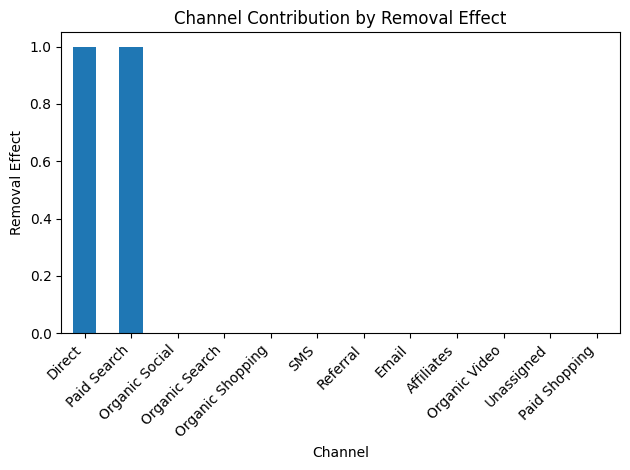

In [ ]:
# Re-define the previous steps to ensure we have the data and then visualize the removal effects
import pandas as pd
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

# Load data
file_path = '/content/June, 24 attribution - Sheet1.csv'
data = pd.read_csv(file_path)

# Process the channel paths
data['Primary channel group path'] = data['Primary channel group path'].apply(eval)

# Initialize a dictionary to count transitions
transition_counts = defaultdict(int)
channel_counts = defaultdict(int)

# Count transitions and channel occurrences
for path in data['Primary channel group path']:
    for i in range(len(path) - 1):
        transition_counts[(path[i], path[i+1])] += 1
        channel_counts[path[i]] += 1
    # Add the final state to channel counts
    channel_counts[path[-1]] += 1

# Create a list of unique channels
channels = list(channel_counts.keys())

# Create the transition matrix
transition_matrix = pd.DataFrame(0, index=channels, columns=channels, dtype=float)

for (src, dst), count in transition_counts.items():
    transition_matrix.at[src, dst] = count

# Normalize the transition matrix
transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0).fillna(0)

# Function to calculate the removal effect of a channel
def calculate_removal_effect(transition_matrix, channel):
    modified_matrix = transition_matrix.copy()
    modified_matrix[channel] = 0
    modified_matrix = modified_matrix.div(modified_matrix.sum(axis=1), axis=0).fillna(0)
    return modified_matrix

# Calculate removal effects for each channel
removal_effects = {}
for channel in channels:
    modified_matrix = calculate_removal_effect(transition_matrix, channel)
    # Calculate the effect on conversion probability
    effect = 1 - modified_matrix.loc[channel].sum()
    removal_effects[channel] = effect

# Convert removal effects to a DataFrame
removal_effects_df = pd.DataFrame.from_dict(removal_effects, orient='index', columns=['Removal Effect'])

# Plot the removal effects
plt.figure(figsize=(12, 6))
removal_effects_df.sort_values(by='Removal Effect', ascending=False).plot(kind='bar', legend=False)
plt.title('Channel Contribution by Removal Effect')
plt.xlabel('Channel')
plt.ylabel('Removal Effect')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


**Conclusion** :

Direct & paid search probability is 100%, so, if we remove those it may affect our overall performance.